# quantinium Forage Task

by: Camilo Palacios

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data
df_purchase = pd.read_csv('QVI_purchase_behaviour.csv')
df_transac = pd.read_excel('QVI_transaction_data.xlsx')
# Convert Excel seria number to datetime
df_transac['date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df_transac['DATE'],unit='D')
print(df_transac.head(10))

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips 

In [9]:
# Create a column for only the product name
df_transac['product_base'] = (
    df_transac['PROD_NAME']
    .str.split(r'\s{2,}').str[0]                      #split by 2+ spaces and take the first part
    .str.replace(r'[^A-Za-z\s]', '', regex=True)      #remove special characters and numbers
    .str.replace(r'\s+', ' ', regex=True)             #remove leading/trailing spaces
    .str.strip()
)
print(df_transac.head(10))

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   
5  43604          4            4074    2982        57   
6  43601          4            4149    3333        16   
7  43601          4            4196    3539        24   
8  43332          5            5026    4525        42   
9  43330          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES       date  \
0    Natural Chip        Compny SeaSalt175g         2        6.0 2018-10-17   
1                  CCs Nacho Cheese    175g         3        6.3 2019-05-14   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9 2019-05-20   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5   

In [17]:
# Count the times a word is repeated
products = df_transac['product_base'].str.split().explode()
count_prod = products.value_counts().reset_index()
count_prod.columns = ['word','count']
print(count_prod.head(20))

         word  count
0           g  76539
1      Kettle  41288
2       Chips  34427
3      Smiths  28860
4    Pringles  25102
5     Doritos  24962
6     Crinkle  23960
7        Corn  20554
8      Cheese  20001
9         Cut  19140
10       Salt  18900
11       Chip  18645
12      Thins  14075
13        Sea  12676
14       Sour  12366
15      Salsa  12245
16        RRD  11894
17  Infuzions  11057
18   Original  10812
19     Chilli  10728


In [15]:
# Remove products that are not chips (salsa)
df_chips = df_transac[~df_transac['PROD_NAME'].str.contains('salsa', case = False, regex = True)]
print(df_chips.sort_values(by='PROD_QTY', ascending=False).head(10))
# Remove customer with outlier values
df_chips = df_chips[df_chips['LYLTY_CARD_NBR'] != 226000]

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69763   43605        226          226000  226210         4   
69762   43331        226          226000  226201         4   
135225  43600         46           46296   42138        81   
69523   43600         71           71142   69852        96   
69502   43330         55           55144   49328        44   
69496   43327         49           49303   45789        14   
69486   43601         45           45006   40460        37   
69483   43327         43           43126   39445        25   
69474   43330         33           33138   30332        68   
69472   43329         32           32193   29196       110   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
69763           Dorito Corn Chp     Supreme 380g       200      650.0   
69762           Dorito Corn Chp     Supreme 380g       200      650.0   
135225           Pringles Original   Crisps 134g         5       18.5   
69523             WW Orig

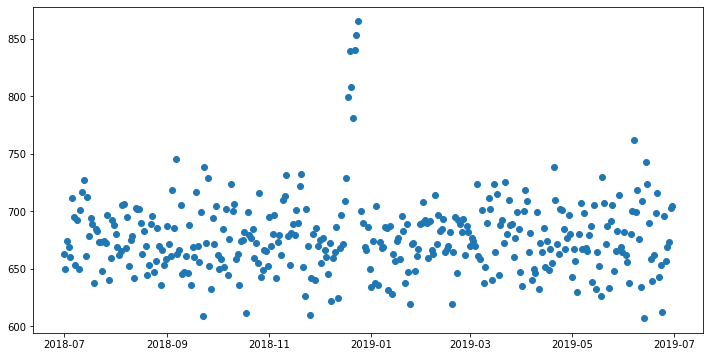

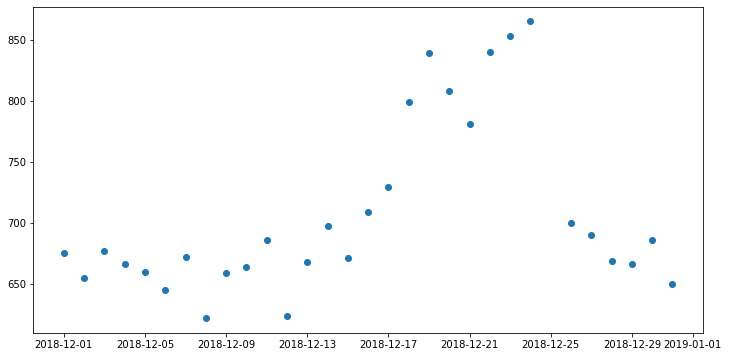

In [23]:
# Count number of transaction per date
transaction_per_date= df_chips.groupby('date').size().reset_index(name='num_transactions')
# Plot number of transaction per date
plt.figure(figsize=(12,6))
plt.scatter(transaction_per_date['date'],transaction_per_date['num_transactions'])
plt.show()
# Isolate sales in december
sales_dec = transaction_per_date[transaction_per_date['date'].dt.month==12]
plt.figure(figsize=(12,6))
plt.scatter(sales_dec['date'],sales_dec['num_transactions'])
plt.show()
# No sales on dec-25

<function matplotlib.pyplot.show(close=None, block=None)>

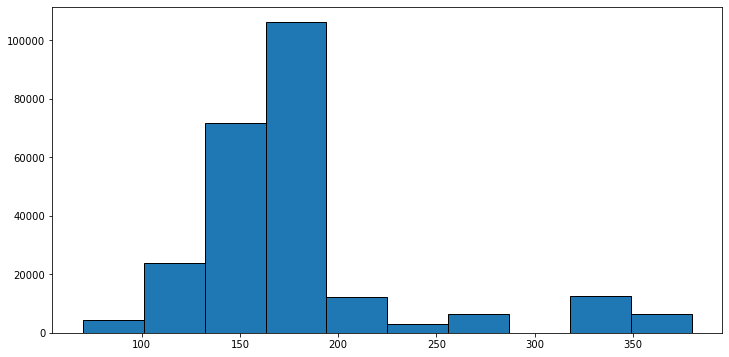

In [31]:
# Get products size
df_chips['PACK_SIZE']=df_chips['PROD_NAME'].str.extract(r'(\d+)').astype(float)
# Create histogram for size distrubution
plt.figure(figsize=(12,6))
counts,bins,patches = plt.hist(df_chips['PACK_SIZE'].dropna(), bins=10, edgecolor='black')
plt.show

In [34]:
# Group by brand names
df_chips['BRAND']= df_chips['PROD_NAME'].str.split().str[0]
brand_count = df_chips['BRAND'].value_counts().reset_index()
brand_count.columns = ['BRAND','count']
print(brand_count)

# Match repeated names
brand_mapping = {
    'rrd':'Red',
    'infzns':'Infuzion',
    'smith':'Smiths',
    'snbts':'Sunbites',
    'grain':'GrnWves',
    'woolworths':'WW'
}
df_chips['BRAND']=df_chips['BRAND'].str.lower().replace(brand_mapping)
df_chips['BRAND']=df_chips['BRAND'].str.title()

brand_count = df_chips['BRAND'].value_counts().reset_index()
brand_count.columns = ['BRAND','count']
print(brand_count)

         BRAND  count
0       Kettle  41288
1       Smiths  27390
2     Pringles  25102
3      Doritos  22041
4        Thins  14075
5          RRD  11894
6    Infuzions  11057
7           WW  10320
8         Cobs   9693
9     Tostitos   9471
10    Twisties   9454
11    Tyrrells   6442
12       Grain   6272
13     Natural   6050
14    Cheezels   4603
15         CCs   4551
16         Red   4427
17      Dorito   3183
18      Infzns   3144
19       Smith   2963
20     Cheetos   2927
21       Snbts   1576
22      Burger   1564
23  Woolworths   1516
24     GrnWves   1468
25    Sunbites   1432
26         NCC   1419
27      French   1418
        BRAND  count
0      Kettle  41288
1      Smiths  30353
2    Pringles  25102
3     Doritos  22041
4         Red  16321
5       Thins  14075
6          Ww  11836
7   Infuzions  11057
8        Cobs   9693
9    Tostitos   9471
10   Twisties   9454
11    Grnwves   7740
12   Tyrrells   6442
13    Natural   6050
14   Cheezels   4603
15        Ccs   4551
16   

In [38]:
#####################  CUSTOMER DATA  ########################
df_purchase['AGE_GRP']=df_purchase['LIFESTAGE'].str.split().str[0]
df_purchase['CUST_TYP']=df_purchase['LIFESTAGE'].str.split().str[-1]
print(df_purchase.head(10))
age_grp=df_purchase['AGE_GRP'].value_counts().reset_index()
age_grp.columns=['GROUP','count']
print(age_grp)
cust_typ=df_purchase['CUST_TYP'].value_counts().reset_index()
cust_typ.columns=['CUST_TYP','count']
print(cust_typ)
category=df_purchase['PREMIUM_CUSTOMER'].value_counts().reset_index()
category.columns=['Category','count']
print(category)

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER AGE_GRP  \
0            1000   YOUNG SINGLES/COUPLES          Premium   YOUNG   
1            1002   YOUNG SINGLES/COUPLES       Mainstream   YOUNG   
2            1003          YOUNG FAMILIES           Budget   YOUNG   
3            1004   OLDER SINGLES/COUPLES       Mainstream   OLDER   
4            1005  MIDAGE SINGLES/COUPLES       Mainstream  MIDAGE   
5            1007   YOUNG SINGLES/COUPLES           Budget   YOUNG   
6            1009            NEW FAMILIES          Premium     NEW   
7            1010   YOUNG SINGLES/COUPLES       Mainstream   YOUNG   
8            1011   OLDER SINGLES/COUPLES       Mainstream   OLDER   
9            1012          OLDER FAMILIES       Mainstream   OLDER   

          CUST_TYP  
0  SINGLES/COUPLES  
1  SINGLES/COUPLES  
2         FAMILIES  
3  SINGLES/COUPLES  
4  SINGLES/COUPLES  
5  SINGLES/COUPLES  
6         FAMILIES  
7  SINGLES/COUPLES  
8  SINGLES/COUPLES  
9         FAMILIES 